##Github Link
https://github.com/aakhunaizi/IT9002_202306801

##Dataset Link
https://snap.stanford.edu/data/web-FineFoods.html

##Task 1 - Problem Statement Formulation and Definition


###Motivation

Working as an Associate Product Manager for a leading FoodTech company in the region, Calo, has given me direct exposure to the constantly growing and evolving landscape of online commerce and how critical it is for businesses to have a better understanding of their customers than ever before.

Being a highly competitive market, a customer-obsessed company can have an edge over its competitors by investing time and resources into analysing its customers' reviews as they are an invaluable source of insights.

Analyzing the sentiment of customer reviews helps in identifying the customers' preferences and pain points when using a company's products and services, making it easier to make informed decisions on how resources should be allocated and what efforts should be prioritized to give customers the best experience.

Although this project does not use Calo customer reviews, it aims to serve as a proof of concept on the usage of sentiment analysis on customer reviews to gain a competitive advantage in the market.

###Problem Statement

Analyzing the sentiment of customer reviews, if done in a manual and traditional manner, has proven to be a challenging and extremely time-consuming process, especially for regional or international companies that are scaling up at a rapid pace.

Customer reviews can be written in multiple languages, are diverse in nature, and can include the usage of sarcasm, informal language, slang, or even different writing styles. In addition to these factors, human bias and subjectivity make accurately understanding customer sentiment and gaining valuable insights an even more challenging process.

###Expected Result

Implementing a customer review sentiment analysis solution powered by natural language processing (NLP) and machine learning (ML) techniques can help companies overcome the limitations of manual, traditional methods.

Some of its benefits include but are not limited to:


*   Automating the customer review analysis process
*   Freeing up valuable time and resources
*   Gathering deeper customer insights by uncovering hidden trends in the data as well as predicting future customer behavior
*   Improving the product by gaining a better understanding of the customers' pain points and prioritizing them based on their impact.
*   Enhancing the customer experience by proactively tackling negative trends before they escalate and cause more damage.

The scope of this project will primarily focus on accurately predicting whether a customer's text review has a positive or negative sentiment.

##Task 2 - Selection of an Appropriate Data Set (Data Collection)

###Source of Dataset

The source of the dataset is the Stanford Network Analysis Project (SNAP) and consists of reviews of fine foods from amazon.

The dataset was selected based on the following factors:

*   Reputable source of data (SNAP)
*   Sufficient data size (~500,000 reviews)
*   Quality of data (Reliable with minimal skew)
*   Reviews originating from a large number of users (256,059 users)
*   Large number of products being reviewed (74,258 products)
*   Large number of users with over 50 reviews (260 users)
*   Sufficient number of words per review (Median of 56 words)
*   Duration of data gathering (October 1999 to October 2012)



###Initial Data Visualization and Summary of Data

In [ ]:
#Importing pandas library
import pandas as pd

#Creating a dataframe df and reading the csv dataset
df = pd.read_csv(r"/content/drive/MyDrive/Reviews.csv", nrows=50000)

#Displaying the first five rows of the dataset
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
#Description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      50000 non-null  int64 
 1   ProductId               50000 non-null  object
 2   UserId                  50000 non-null  object
 3   ProfileName             49997 non-null  object
 4   HelpfulnessNumerator    50000 non-null  int64 
 5   HelpfulnessDenominator  50000 non-null  int64 
 6   Score                   50000 non-null  int64 
 7   Time                    50000 non-null  int64 
 8   Summary                 49998 non-null  object
 9   Text                    50000 non-null  object
dtypes: int64(5), object(5)
memory usage: 3.8+ MB


Text(0.5, 1.0, 'Review Score')

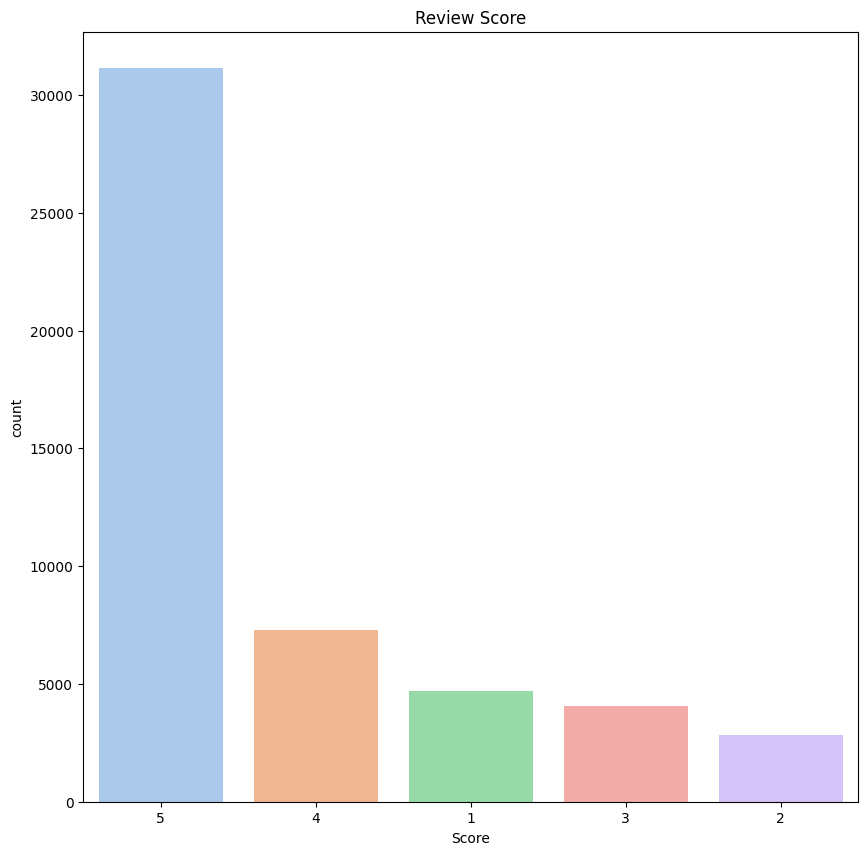

In [ ]:
#Review score distribution

#Importing seaborn and pyplot
import seaborn as sns
import matplotlib.pyplot as plt

#Plotting a countplot of the review scores (1-5)
sns.countplot(x='Score', data=df, palette="pastel", order = df['Score'].value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Review Score')

###Shape of the Dataset

In [ ]:
#Displaying data shape
display(df.shape)

(50000, 10)

###Dataset Labels



Score is the only label within the dataset and it is used to extract the sentiment values.

In [ ]:
#Dropping irrelevant columns
df.drop(['Id', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary'], axis=1, inplace=True)

In [ ]:
#Displaying the first five rows of the dataset
df.head()

,ProductId,UserId,Score,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,5,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,1,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,4,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,2,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,Great taffy at a great price. There was a wid...


In [ ]:
#Description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProductId  50000 non-null  object
 1   UserId     50000 non-null  object
 2   Score      50000 non-null  int64 
 3   Text       50000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
#Displaying data shape
display(df.shape)

(50000, 4)

In [ ]:
#Finding duplicate rows
df.duplicated().sum()

101

In [ ]:
#Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
#Sum of duplicate rows
df.duplicated().sum()

0

In [ ]:
#Sum of null value rows
df.isnull().sum()

ProductId    0
UserId       0
Score        0
Text         0
dtype: int64

In [ ]:
#Assigning reviews with score > 3 as positive sentiment
#Assigning reviews with score < 3 as negative sentiment
#Removing reviews with score = 3
df = df[df.Score != 3]
df['Sentiment'] = df['Score'].apply(lambda rating : 1 if rating > 3 else 0)

In [ ]:
#Displaying the first five rows of the dataset
df.head()

,ProductId,UserId,Score,Text,Sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,5,I have bought several of the Vitality canned d...,1
1,B00813GRG4,A1D87F6ZCVE5NK,1,Product arrived labeled as Jumbo Salted Peanut...,0
2,B000LQOCH0,ABXLMWJIXXAIN,4,This is a confection that has been around a fe...,1
3,B000UA0QIQ,A395BORC6FGVXV,2,If you are looking for the secret ingredient i...,0
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,Great taffy at a great price. There was a wid...,1


In [ ]:
#Checking if any reviews with score = 3 exist
df.loc[df['Score'] == 3]

,ProductId,UserId,Score,Text,Sentiment


Text(0.5, 1.0, 'Review Sentiment')

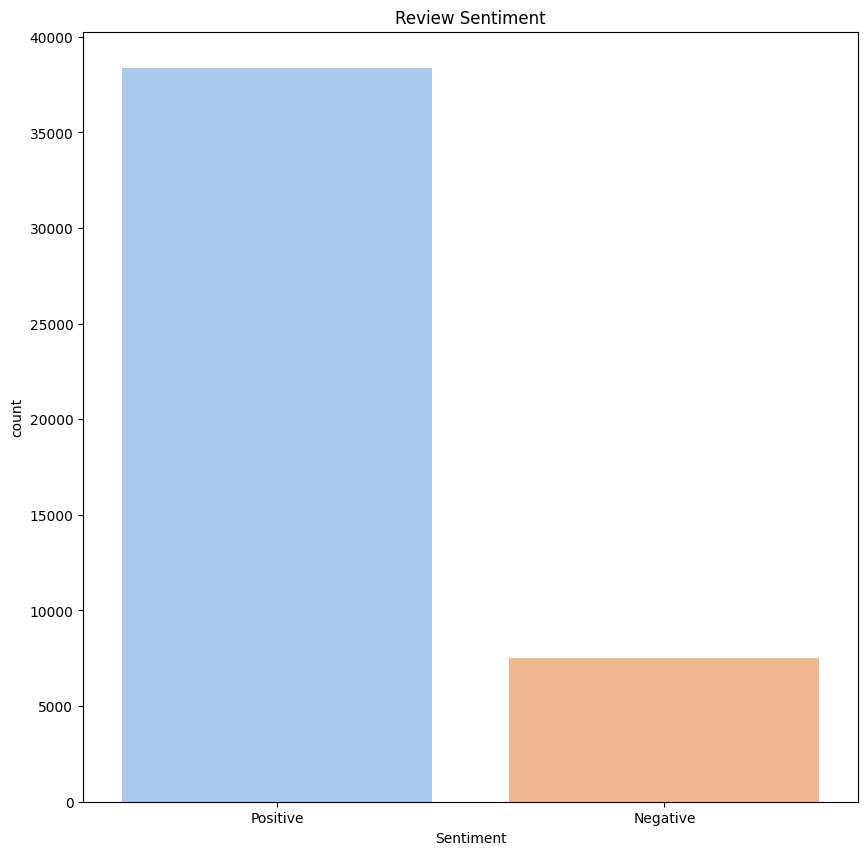

In [ ]:
#Distribution of positive and negative sentiment reviews
sns.countplot(x='Sentiment', data=df, order=df.Sentiment.value_counts().index, palette="pastel")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.xticks([0, 1], ['Positive', 'Negative'])
plt.xlabel("Sentiment")
plt.title("Review Sentiment")

In [ ]:
#Total positive and negative sentiments
df.Sentiment.value_counts()
#1 is positive sentiment
#0 is negative sentiment

1    38348
0     7515
Name: Sentiment, dtype: int64

## Task 3 - Text Preprocessing

This section includes a series of processes to clean, simplify, and standardize text to make it easier for natural language processing (NLP) algorithms to understand and extract the meaning of text.

###Converting Text to Lowercase

In [ ]:
#Creating a function to convert text to lowercase
def text_lowercase(text):
	return text.lower()

#Converting all words in the 'Text' column to lowercase
df['Text'] = df['Text'].apply(text_lowercase)

###Removing URLs from Text

In [ ]:
#Importing regular expressions
import re

#Creating a function to remove URLs from text
def remove_url(text):
  text = re.sub(r'http\S+', '', text)
  return text

#Removing any existing URLs in the rows of the 'Text' column
df['Text'] = df['Text'].apply(remove_url)

###Removing HTML Tags from Text

In [ ]:
#Creating a function to remove HTML tags from text
def remove_html(text):
  pattern = re.compile('<.*?>')
  text = re.sub(pattern, '', text)
  return text

#Removing any existing HTML tags in the rows of the 'Text' column
df['Text'] = df['Text'].apply(remove_html)

###Removing Punctuation from Text

In [ ]:
#Importing string
import string

#Creating a function to remove punctuation from text
def remove_punctuation(text):
	translator = str.maketrans('', '', string.punctuation)
	return text.translate(translator)

 #Removing any existing punctuation in the rows of the 'Text' column
df['Text'] = df['Text'].apply(remove_punctuation)

###Removing Whitespaces from Text

In [ ]:
#Creating a function to remove whitespaces from text
def remove_whitespace(text):
	return " ".join(text.split())

#Removing any existing whitespaces in the rows of the 'Text' column
df['Text'] = df['Text'].apply(remove_whitespace)

###Removing Stopwords

In [ ]:
#Installing NLTK
!pip install nltk

In [ ]:
#Importing NLTK and downloading the necessary packages
import nltk

nltk.download('all')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
#Importing the corpus of stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Creating a function to remove stopwords
def remove_stopwords(text):
  stop_words = set(stopwords.words("english"))
  word_tokens = word_tokenize(text)
  filtered_text = [word for word in word_tokens if word not in stop_words]
  return ' '.join(filtered_text)

#Removing stopwords from all rows in the 'Text' column
df['Text'] = df['Text'].apply(remove_stopwords)

###Wordcloud

In [ ]:
#Positive sentiment
positive = df[df['Sentiment'] == 1].copy()
#Negative sentiment
negative = df[df['Sentiment'] == 0].copy()

from sklearn.utils import resample

#Resampling
positive = resample(positive, replace=False, n_samples=len(negative),random_state=123)
df = pd.concat([positive, negative])
print(df.Sentiment.value_counts())

1    7515
0    7515
Name: Sentiment, dtype: int64


In [ ]:
import wordcloud
from wordcloud import WordCloud
def show_wordcloud(df, title):
    wordcloud_text = ' '.join(df['Text'].astype(str))
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='black',
                    colormap='bone', collocation_threshold = 3, width=800, height=600).generate(wordcloud_text)

    plt.figure(figsize=(10,10), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

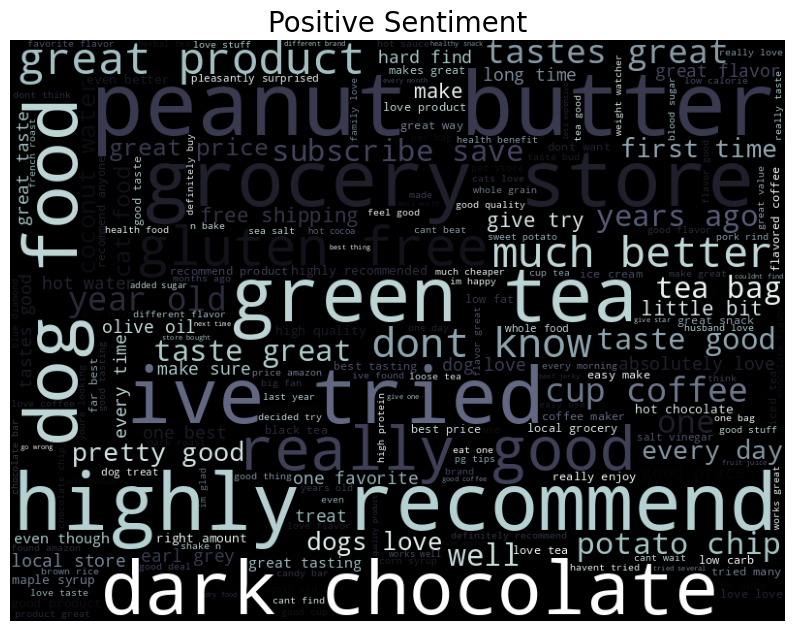

In [ ]:
#Positive sentiment wordcloud
show_wordcloud(positive, "Positive Sentiment")

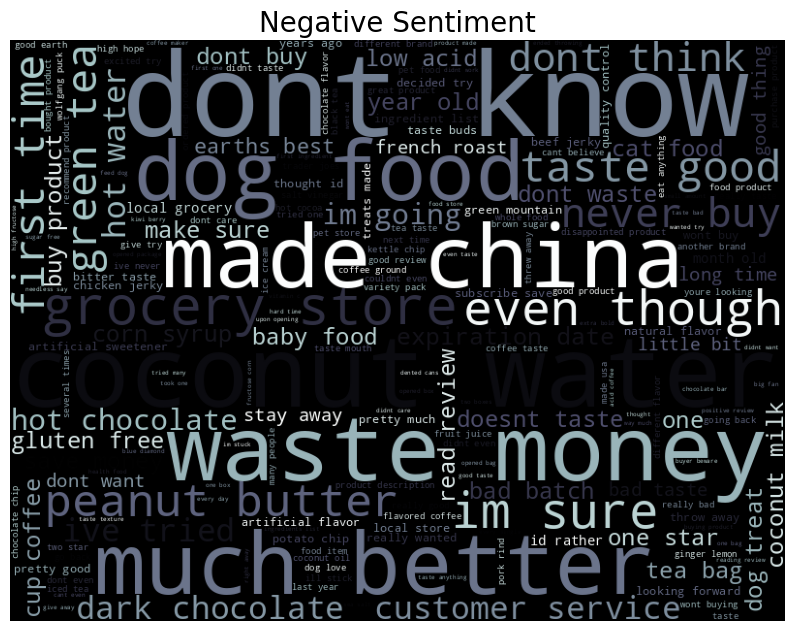

In [ ]:
#Negative sentiment wordcloud
show_wordcloud(negative, "Negative Sentiment")

##Task 4 - Text Representation

This section includes a series of processes to convert raw text data into a format that can be easily understood and analyzed by computers to identify and extract relevant information from the text.



###TF-IDF

In [ ]:
#Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 10000)
X = cv.fit_transform(df['Text'])

In [ ]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Feature names
cv.get_feature_names_out()

array(['08', '08oz', '099', ..., 'zoo', 'zucchini', 'zukes'], dtype=object)

###PoS Tagging

In [ ]:
#Importing NLTK and downloading the necessary packages
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
#Importing the necessary packages
from nltk.tokenize import word_tokenize
from nltk import pos_tag

#Creating a function to convert text into word tokens with their tags
def pos_tagging(text):
	word_tokens = word_tokenize(text)
	return pos_tag(word_tokens)

#Applying PoS tagging
df['Text'].apply(pos_tagging)

12095    [(2, CD), (dogs, NNS), (product, NN), (used, V...
37498    [(vegetarian, JJ), (runner, NN), (needed, VBD)...
29665    [(price, NN), (fair, NN), (works, VBZ), (fine,...
32618    [(read, JJ), (reviews, NNS), (coconut, VBP), (...
17089    [(reading, VBG), (book, NN), (food, NN), (pets...
                               ...                        
49960    [(oily, RB), (like, IN), (flavor, NN), (combin...
49973    [(bought, VBD), (3, CD), (flavors, NNS), (bars...
49975    [(local, JJ), (grocer, NN), (recently, RB), (d...
49977    [(review, NN), (hazelnut, NN), (chocolate, NN)...
49986    [(saw, JJ), (local, JJ), (health, NN), (food, ...
Name: Text, Length: 15030, dtype: object

###Word Embeddings (Word2Vec)

In [ ]:
#Importing the necessary packages
from gensim.models import Word2Vec

In [ ]:
# Preparing the dataset
sentences = df['Text'].apply(word_tokenize)

In [ ]:
sentences[3]

['looking',
 'secret',
 'ingredient',
 'robitussin',
 'believe',
 'found',
 'got',
 'addition',
 'root',
 'beer',
 'extract',
 'ordered',
 'good',
 'made',
 'cherry',
 'soda',
 'flavor',
 'medicinal']

In [ ]:
# Training the Word2Vec model
model = Word2Vec(sentences, min_count=1)

In [ ]:
# Finding Word Vectors
vector = model.wv['nice']

In [ ]:
vector

array([-0.590732  ,  0.92159253,  0.1840151 ,  1.5201386 , -0.943574  ,
       -1.415056  ,  0.08786003,  1.1476963 , -0.0573283 , -0.04966137,
        0.33011842, -2.3189325 ,  0.35450727,  0.7481503 , -0.40901548,
       -0.76155436,  0.9590922 , -0.45441058, -0.04096768, -1.1891639 ,
        0.24988018,  0.97669363,  0.33616623,  0.00278797, -0.14561011,
        1.1671588 , -0.59211636, -0.20352037, -0.3213605 ,  0.5768703 ,
        1.4682668 ,  0.7994466 , -0.39168414,  0.23299551, -0.633959  ,
        1.2858373 ,  0.19383235,  0.18010634, -0.11365937, -0.3674978 ,
        0.12718546,  1.1535919 , -0.39793825, -1.1267297 ,  0.60801446,
       -0.25949377, -0.58693475, -0.46380773, -0.0125768 ,  0.56996644,
        0.64056915,  0.23959985, -0.57818973, -0.7628686 ,  0.06949516,
       -0.6813539 ,  1.3061968 ,  0.29499927, -0.8568597 ,  0.22514129,
       -0.37452996, -1.0736032 ,  0.2744991 ,  0.34485596, -0.9845416 ,
        0.26510638, -0.65449625,  0.12075504, -0.92173046,  1.22

In [ ]:
#Most similar words
similar = model.wv.most_similar('nice')

In [ ]:
similar

[('light', 0.9425188302993774),
 ('subtle', 0.9390808343887329),
 ('pleasant', 0.9384437203407288),
 ('overpowered', 0.932738721370697),
 ('bitterness', 0.9298967123031616),
 ('overpowering', 0.926109254360199),
 ('rich', 0.9244909286499023),
 ('pungent', 0.9240689873695374),
 ('mild', 0.9240344166755676),
 ('lingering', 0.9233019351959229)]

##Task 5 - Text Classification/Prediction and Task 6 - Evaluation, Inferences, Recommendation and Reflection

###Justification for Method Selection

Naive Bayes, Multinomial Naive Bayes, and Logistic Regression were selected as the classification methods due to their effectiveness for multi-class problems. They perform well at differentiating between multiple text categories and are a great choice for a use case such as sentiment analysis.

Moreover, they are highly acccurate and scalable, being able to handle massive collections of text without any issues.

Although more classifiers were tested, these three classifiers were selected as there was a noticeable variation between their performances, facilitating for a clearer and more streamlined evaluation process.

In [ ]:
X = X.toarray()
y = df['Sentiment']
print(X.shape, y.shape)

(15030, 10000) (15030,)


Text(0.5, 1.0, 'Review Sentiment')

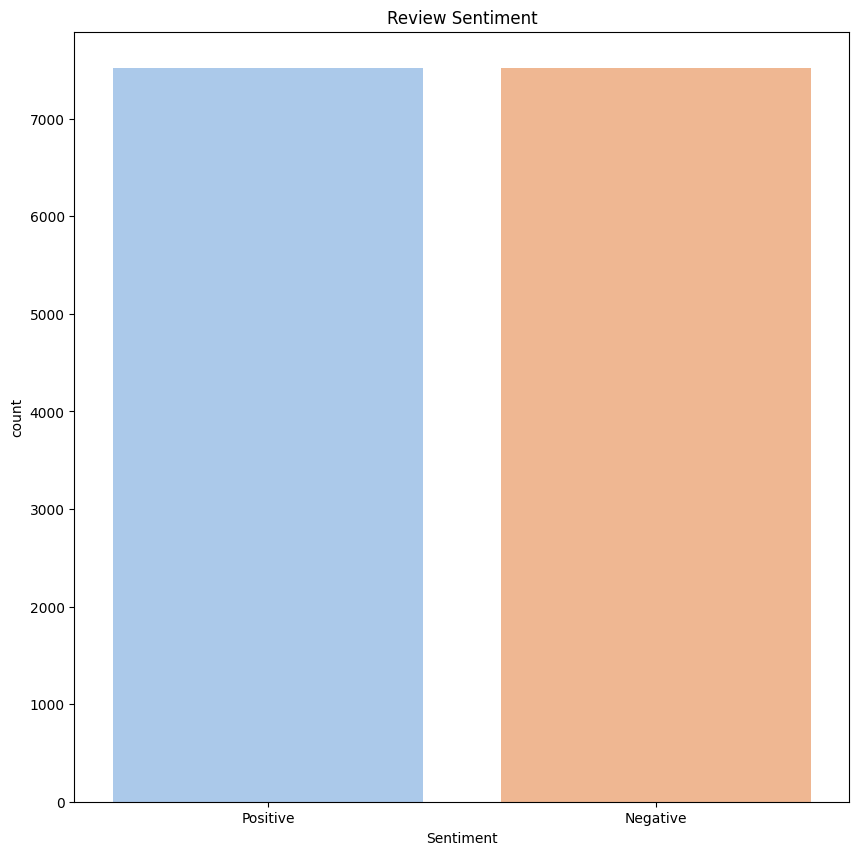

In [ ]:
#Distribution of positive and negative sentiment reviews
sns.countplot(x='Sentiment', data=df, order=df.Sentiment.value_counts().index, palette="pastel")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.xticks([0, 1], ['Positive', 'Negative'])
plt.xlabel("Sentiment")
plt.title("Review Sentiment")

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

SEED=123
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10521, 10000) (10521,)
(4509, 10000) (4509,)


###Gaussian Naive Bayes

In [ ]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))


Training Accuracy score: 0.8557171371542629
Testing Accuracy score: 0.6686626746506986


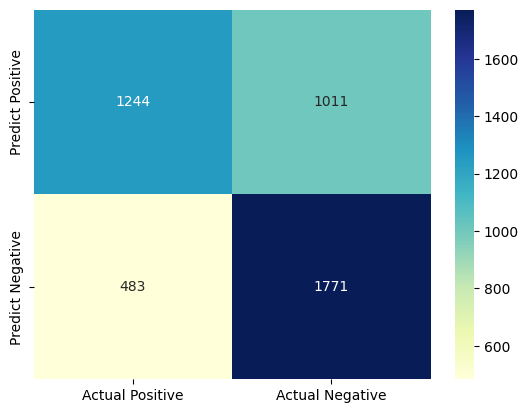

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.72      0.55      0.62      2255
    positive       0.64      0.79      0.70      2254

    accuracy                           0.67      4509
   macro avg       0.68      0.67      0.66      4509
weighted avg       0.68      0.67      0.66      4509



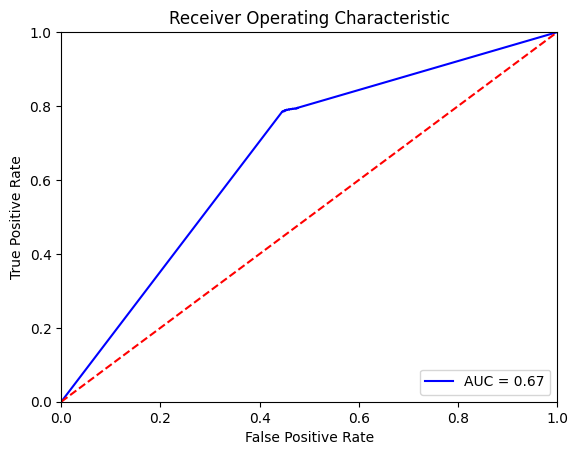

In [ ]:
#AUC-ROC Curve
from sklearn import metrics
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))


Training Accuracy score: 0.9124607927003137
Testing Accuracy score: 0.8587269904635174


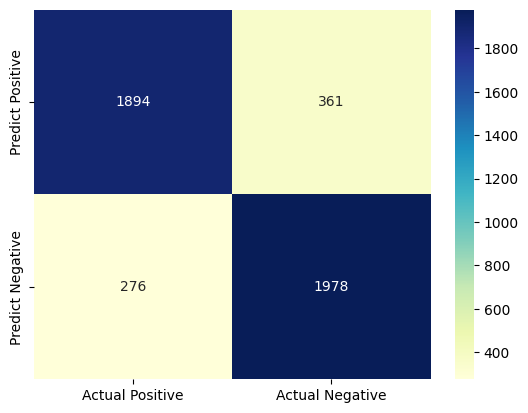

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
#Classification report
import warnings
warnings.filterwarnings("ignore")

print(classification_report(y_test, y_pred_test, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.87      0.84      0.86      2255
    positive       0.85      0.88      0.86      2254

    accuracy                           0.86      4509
   macro avg       0.86      0.86      0.86      4509
weighted avg       0.86      0.86      0.86      4509



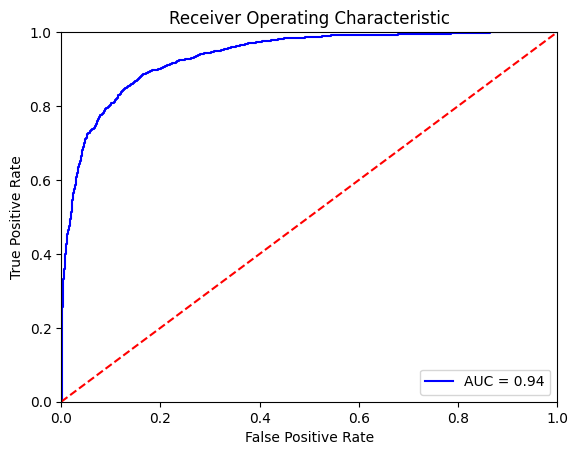

In [ ]:
#AUC-ROC Curve
probs = mnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=SEED)
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))


Training Accuracy score: 0.9196844406425245
Testing Accuracy score: 0.86715457972943


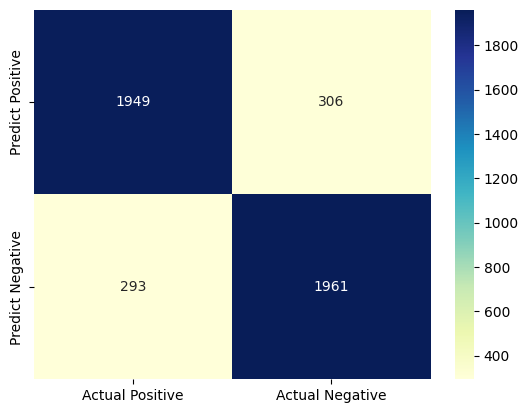

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
#Classification report
print(classification_report(y_test, y_pred_test, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.87      0.86      0.87      2255
    positive       0.87      0.87      0.87      2254

    accuracy                           0.87      4509
   macro avg       0.87      0.87      0.87      4509
weighted avg       0.87      0.87      0.87      4509



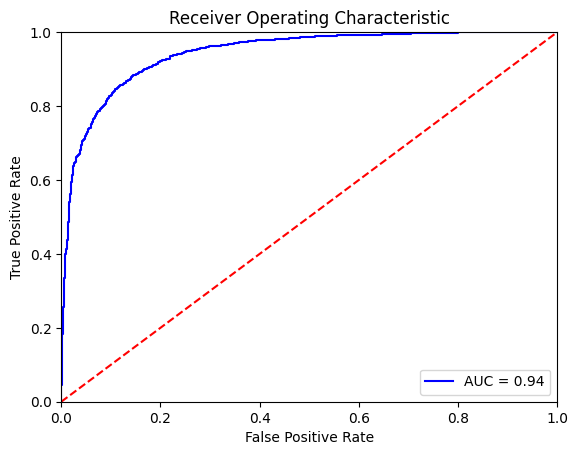

In [ ]:
#AUC-ROC Curve
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###Evaluation and Inference


It is evident from the plots that the AUC for the Logistic Regression ROC curve is higher than that for the Gaussian Naive Bayes ROC curve, but relatively similar to the Multinomial Naive Bayes ROC curve. Therefore, we can say that Logistic Regression clearly did a better job of classifying the positive sentiment than Gaussian Naive Bayes, but had only a slightly better performance than Multinomial Naive Bayes.

The classifiers rank as follows (best to worst):

1.   Logistic Regression
2.   Multinomial Naive Bayes
3.   Gaussian Naive Bayes



###Recommendation

Based on the evaluation and inference of the various metrics discussed above, Logistic Regression and Multinomial Naive Bayes are both great classifier choices for projects revolving around sentiment analysis.

###Reflection

Undertaking this project was a wonderful journey of exploring the intersection between code and linguistics. Converting a mere set of endless rows of data into a beautiful set of visualizations and insights was nothing short of fascinating.

Similar to many aspects of life, this journey also had its fair share of challenges and hardships.

To begin, being excited to work on a project of this nature for the first time overloaded me with ideas of topics to explore, and it took me a decent amount of time to settle on a topic that was not too complex to be completed within the deadline set for the project, but also acommodated for future work and enhancements related to my field of work.

The dataset selection process was not straightforward either as it was initially difficult to determine the qualities and factors that make up a good dataset. The challenges persisted with text preprocessing, text representation, and text classification as these processes required lots of research and code customization, and countless trials and errors to reach a satisfactory result.

A major learning that revealed itself towards the end of the project was that the size of the dataset, containing over 500,000 rows, was the root cause of many unanticipated issues such as long code execution times and crashes due to insufficient computational resources. This, however, was rectified by limiting the number of rows in the dataframe to 50,000.

In addition, the reviews were skewed heavily towards the positive sentiment, causing a massive drop in the accuracy and overall performance of the classifiers. This was combated by resampling the data and having an even split between reviews of positive sentiment and negative sentiment.

Beyond the scope of this course, I plan to revisit this project with a different dataset consisting of food-related customer reviews submitted by my organization's customers, and combining it with automated flows that proactively award loyal customers or compensate customers that had subpar experiences with their meals.

##References

1.   https://snap.stanford.edu/data/web-FineFoods.html
2.   https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
3.   https://www.kaggle.com/code/shashanksai/text-preprocessing-using-python
4.   https://www.kaggle.com/code/sonalisingh1411/nlp-part-1-amazon-fine-food-sentiment-analysis
5.   https://www.kaggle.com/code/kshitijmohan/sentiment-analysis-universal-sentence-encoder-91
